In [1]:
! pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.4/568.4 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [63]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
import os

In [64]:
# Load your encoded fraud data
encoded_fraud_data_df = pd.read_csv('../content/sample_data/encoded_fraud_data.csv')


In [65]:
creditcard_data = pd.read_csv('../content/sample_data/creditcard.csv')

In [66]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
encoded_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,key,transaction_frequency,...,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,732758368,0,1,0.0,...,False,False,False,False,False,False,False,False,False,False
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,350311387,0,1,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,2621473820,1,1,0.0,...,False,False,False,False,False,False,False,False,True,False
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,0.911994,3840542443,0,1,0.0,...,False,False,False,False,False,False,False,False,False,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,1.376155,415583117,0,1,0.0,...,False,False,False,False,False,False,False,False,False,True


In [68]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding device_id
label_encoder = LabelEncoder()
encoded_fraud_data_df['device_id_encoded'] = label_encoder.fit_transform(encoded_fraud_data_df['device_id'])




In [69]:
# Drop original device_id column if you encoded it
encoded_fraud_data_df.drop(columns=['device_id'], inplace=True)

In [70]:
encoded_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,key,transaction_frequency,velocity,...,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari,device_id_encoded
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,0.679914,732758368,0,1,0.0,-0.160204,...,False,False,False,False,False,False,False,False,False,89215
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,2.304476,350311387,0,1,0.0,-1.142592,...,False,False,False,False,False,False,False,False,False,24078
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,2.304476,2621473820,1,1,0.0,-1.197169,...,False,False,False,False,False,False,False,True,False,131216
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,0.911994,3840542443,0,1,0.0,0.385567,...,False,False,False,False,False,False,False,False,True,3977
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,1.376155,415583117,0,1,0.0,0.112681,...,False,False,False,False,False,False,False,False,True,68757


In [71]:
# Convert signup_time and purchase_time to datetime if not already
encoded_fraud_data_df['signup_time'] = pd.to_datetime(encoded_fraud_data_df['signup_time'])
encoded_fraud_data_df['purchase_time'] = pd.to_datetime(encoded_fraud_data_df['purchase_time'])

# Extracting useful features
encoded_fraud_data_df['time_diff'] = (encoded_fraud_data_df['purchase_time'] - encoded_fraud_data_df['signup_time']).dt.total_seconds() / 3600  # time difference in hours
encoded_fraud_data_df['signup_hour'] = encoded_fraud_data_df['signup_time'].dt.hour  # hour of signup
encoded_fraud_data_df['purchase_hour'] = encoded_fraud_data_df['purchase_time'].dt.hour  # hour of purchase

# You can also extract other components (day of week, etc.)


In [72]:
encoded_fraud_data_df.head()

,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class,key,transaction_frequency,velocity,...,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari,device_id_encoded,time_diff,signup_hour,purchase_hour
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,0.679914,732758368,0,1,0.0,-0.160204,...,False,False,False,False,False,False,89215,1251.856111,22,2
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,2.304476,350311387,0,1,0.0,-1.142592,...,False,False,False,False,False,False,24078,4.984444,20,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,2.304476,2621473820,1,1,0.0,-1.197169,...,False,False,False,False,True,False,131216,0.000278,18,18
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,0.911994,3840542443,0,1,0.0,0.385567,...,False,False,False,False,False,True,3977,136.690278,21,13
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,1.376155,415583117,0,1,0.0,0.112681,...,False,False,False,False,False,True,68757,1211.516944,7,18


In [73]:
# Dropping original device_id, signup_time, and purchase_time columns after feature extraction and encoding
encoded_fraud_data_df.drop(columns=['signup_time', 'purchase_time'], inplace=True)


In [74]:
encoded_fraud_data_df.head()

,user_id,purchase_value,age,ip_address,class,key,transaction_frequency,velocity,hour_of_day,day_of_week,...,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari,device_id_encoded,time_diff,signup_hour,purchase_hour
0,22058,-0.160204,0.679914,732758368,0,1,0.0,-0.160204,-1.377455,0.991020,...,False,False,False,False,False,False,89215,1251.856111,22,2
1,333320,-1.142592,2.304476,350311387,0,1,0.0,-1.142592,-1.522122,-1.501259,...,False,False,False,False,False,False,24078,4.984444,20,1
2,1359,-1.197169,2.304476,2621473820,1,1,0.0,-1.197169,0.937208,-0.005891,...,False,False,False,False,True,False,131216,0.000278,18,18
3,150084,0.385567,0.911994,3840542443,0,1,0.0,0.385567,0.213876,-1.501259,...,False,False,False,False,False,True,3977,136.690278,21,13
4,221365,0.112681,1.376155,415583117,0,1,0.0,0.112681,0.937208,-0.504347,...,False,False,False,False,False,True,68757,1211.516944,7,18


In [75]:
# Separating features and target variable
x_fraud = encoded_fraud_data_df.drop(columns=['class'])
y_fraud = encoded_fraud_data_df['class']
print("Feature shape:", x_fraud.shape)
print("Target shape:", y_fraud.shape)
# select boolean
boolcolumns = x_fraud.select_dtypes(include= 'bool').columns
x_fraud[boolcolumns] = x_fraud[boolcolumns].apply(lambda x: x.astype(int))

Feature shape: (151112, 201)
Target shape: (151112,)


In [76]:
x_fraud.head()


,user_id,purchase_value,age,ip_address,key,transaction_frequency,velocity,hour_of_day,day_of_week,sex_M,...,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari,device_id_encoded,time_diff,signup_hour,purchase_hour
0,22058,-0.160204,0.679914,732758368,1,0.0,-0.160204,-1.377455,0.991020,1,...,0,0,0,0,0,0,89215,1251.856111,22,2
1,333320,-1.142592,2.304476,350311387,1,0.0,-1.142592,-1.522122,-1.501259,0,...,0,0,0,0,0,0,24078,4.984444,20,1
2,1359,-1.197169,2.304476,2621473820,1,0.0,-1.197169,0.937208,-0.005891,1,...,0,0,0,0,1,0,131216,0.000278,18,18
3,150084,0.385567,0.911994,3840542443,1,0.0,0.385567,0.213876,-1.501259,1,...,0,0,0,0,0,1,3977,136.690278,21,13
4,221365,0.112681,1.376155,415583117,1,0.0,0.112681,0.937208,-0.504347,1,...,0,0,0,0,0,1,68757,1211.516944,7,18


In [77]:
x_fraud.head()

,user_id,purchase_value,age,ip_address,key,transaction_frequency,velocity,hour_of_day,day_of_week,sex_M,...,country_Zambia,country_Zimbabwe,browser_FireFox,browser_IE,browser_Opera,browser_Safari,device_id_encoded,time_diff,signup_hour,purchase_hour
0,22058,-0.160204,0.679914,732758368,1,0.0,-0.160204,-1.377455,0.991020,1,...,0,0,0,0,0,0,89215,1251.856111,22,2
1,333320,-1.142592,2.304476,350311387,1,0.0,-1.142592,-1.522122,-1.501259,0,...,0,0,0,0,0,0,24078,4.984444,20,1
2,1359,-1.197169,2.304476,2621473820,1,0.0,-1.197169,0.937208,-0.005891,1,...,0,0,0,0,1,0,131216,0.000278,18,18
3,150084,0.385567,0.911994,3840542443,1,0.0,0.385567,0.213876,-1.501259,1,...,0,0,0,0,0,1,3977,136.690278,21,13
4,221365,0.112681,1.376155,415583117,1,0.0,0.112681,0.937208,-0.504347,1,...,0,0,0,0,0,1,68757,1211.516944,7,18


In [78]:
# For Credit Card Dataset
X_creditcard = creditcard_data.drop(columns=['Class'])  # Drop the target column
y_creditcard = creditcard_data['Class']  # Target column (fraud or not fraud)

In [79]:
from sklearn.model_selection import train_test_split
# For Fraud Dataset
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(x_fraud, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud)

# For Credit Card Dataset
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_creditcard, y_creditcard, test_size=0.2, random_state=42, stratify=y_creditcard)

In [80]:
print(y_train_fraud.value_counts())
print(y_train_credit.value_counts())

class
0    109568
1     11321
Name: count, dtype: int64
Class
0    227451
1       394
Name: count, dtype: int64


In [81]:
# For Credit Card Dataset
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_creditcard, y_creditcard, test_size=0.2, random_state=42)

In [82]:
# Apply SMOTE for Fraud Data
smote_fraud = SMOTE(random_state=42)
X_train_fraud_resampled, y_train_fraud_resampled = smote_fraud.fit_resample(X_train_fraud, y_train_fraud)

# Apply SMOTE for Credit Card Data
smote_creditcard = SMOTE(random_state=42)
X_train_creditcard_resampled, y_train_credit_resampled = smote_creditcard.fit_resample(X_train_credit, y_train_credit)

Model Building

1 Decision Tree

In [83]:
# Fit Decision Tree for Credit Card Data
dt_creditcard = DecisionTreeClassifier(random_state=42)
dt_creditcard.fit(X_train_creditcard_resampled, y_train_credit_resampled)

# Fit Decision Tree for Fraud Data
dt_fraud = DecisionTreeClassifier(random_state=42)
dt_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Predictions for Credit Card Data
y_pred_creditcard = dt_creditcard.predict(X_test_credit)

# Predictions for Fraud Data
y_pred_fraud = dt_fraud.predict(X_test_fraud)

In [84]:
# Evaluation for Credit Card Data
accuracy_creditcard = accuracy_score(y_test_credit, y_pred_creditcard)
precision_creditcard = precision_score(y_test_credit, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_credit, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_credit, y_pred_creditcard, average='weighted')

# Evaluation for Fraud Data
accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')

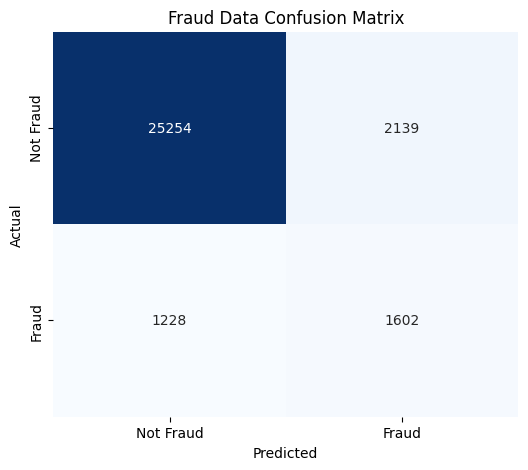

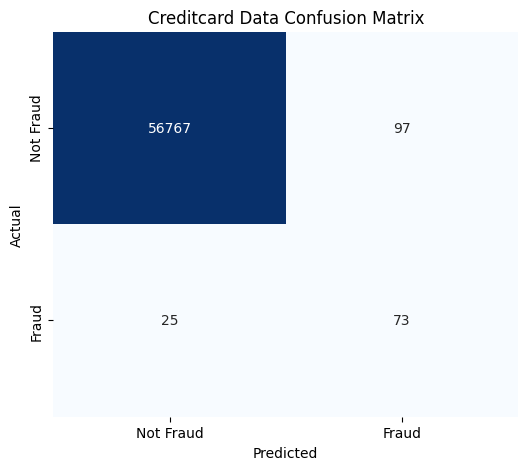

In [85]:
# Confusion Matrix for Credit Card Data
cm_creditcard = confusion_matrix(y_test_credit, y_pred_creditcard)

# Confusion Matrix for Fraud Data
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Fraud Data Confusion Matrix')

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Creditcard Data Confusion Matrix')



<Figure size 1000x600 with 0 Axes>

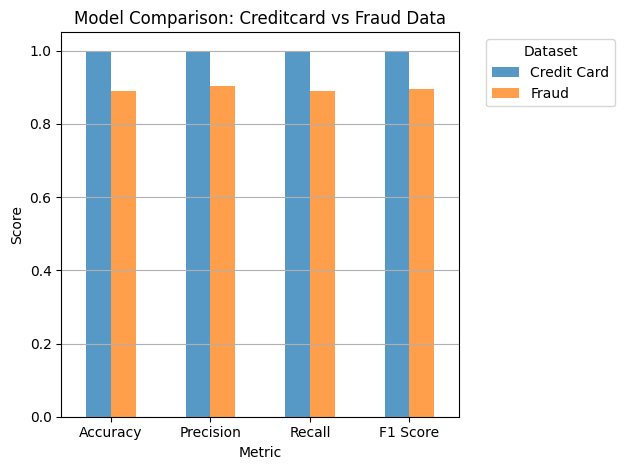

In [86]:
# Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Model Comparison: Creditcard vs Fraud Data')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()


2 Logistic Regression Model

In [87]:
# Initialize the Logistic Regression model
lr_creditcard = LogisticRegression(max_iter=1000, random_state=42)
# Train the model on the credit card dataset
lr_creditcard.fit(X_train_creditcard_resampled, y_train_credit_resampled)

lr_fraud = LogisticRegression(max_iter=1000, random_state=42)
# Train the model on the Fraud data  dataset
lr_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Make Predictions
y_pred_creditcard = lr_creditcard.predict(X_test_credit)
y_pred_fraud = lr_fraud.predict(X_test_fraud)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# Evaluation Metrics
accuracy_creditcard = accuracy_score(y_test_credit, y_pred_creditcard)
precision_creditcard = precision_score(y_test_credit, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_credit, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_credit, y_pred_creditcard, average='weighted')

accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')

# Classification Reports
classification_report_creditcard = classification_report(y_test_credit, y_pred_creditcard)
print("Classification Report for Credit Card Data:\n", classification_report_creditcard)

classification_report_fraud = classification_report(y_test_fraud, y_pred_fraud)
print("Classification Report for Fraud Data:\n", classification_report_fraud)


Classification Report for Credit Card Data:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.92      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Classification Report for Fraud Data:
               precision    recall  f1-score   support

           0       0.95      0.68      0.80     27393
           1       0.18      0.68      0.29      2830

    accuracy                           0.68     30223
   macro avg       0.57      0.68      0.54     30223
weighted avg       0.88      0.68      0.75     30223



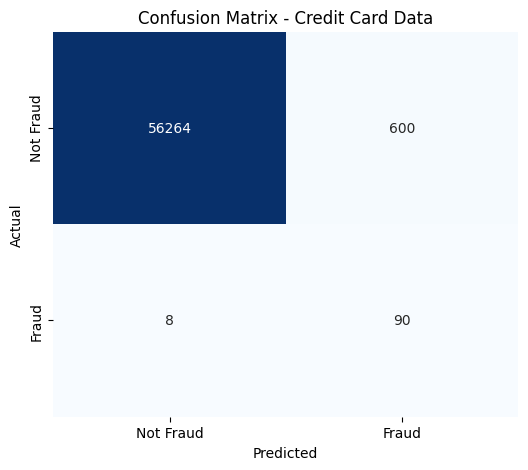

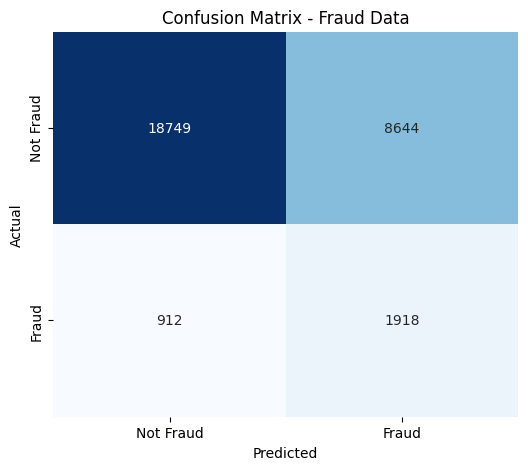

In [89]:
# Confusion Matrix and Plotting
cm_creditcard = confusion_matrix(y_test_credit, y_pred_creditcard)
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Confusion Matrix - Credit Card Data')

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Confusion Matrix - Fraud Data')

<Figure size 1000x600 with 0 Axes>

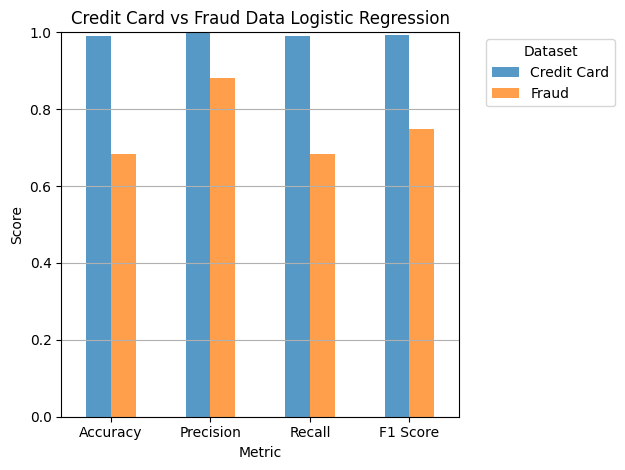

In [90]:
# Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Credit Card vs Fraud Data Logistic Regression')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()


3 Random Forest Model

In [91]:
# Fit Random Forest Model
rf_creditcard = RandomForestClassifier(random_state=42)
rf_creditcard.fit(X_train_creditcard_resampled, y_train_credit_resampled)

rf_fraud = RandomForestClassifier(random_state=42)
rf_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Predictions
y_pred_creditcard = rf_creditcard.predict(X_test_credit)
y_pred_fraud = rf_fraud.predict(X_test_fraud)


In [92]:
# Evaluation Metrics
accuracy_creditcard = accuracy_score(y_test_credit, y_pred_creditcard)
precision_creditcard = precision_score(y_test_credit, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_credit, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_credit, y_pred_creditcard, average='weighted')

accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')

# Classification Reports
classification_report_creditcard = classification_report(y_test_credit, y_pred_creditcard)
print("Classification Report for Credit Card Data:\n", classification_report_creditcard)

classification_report_fraud = classification_report(y_test_fraud, y_pred_fraud)
print("Classification Report for Fraud Data:\n", classification_report_fraud)

Classification Report for Credit Card Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Classification Report for Fraud Data:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     27393
           1       0.75      0.53      0.62      2830

    accuracy                           0.94     30223
   macro avg       0.85      0.76      0.79     30223
weighted avg       0.93      0.94      0.93     30223



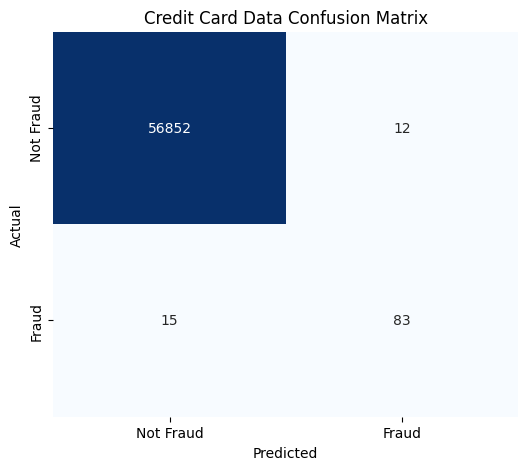

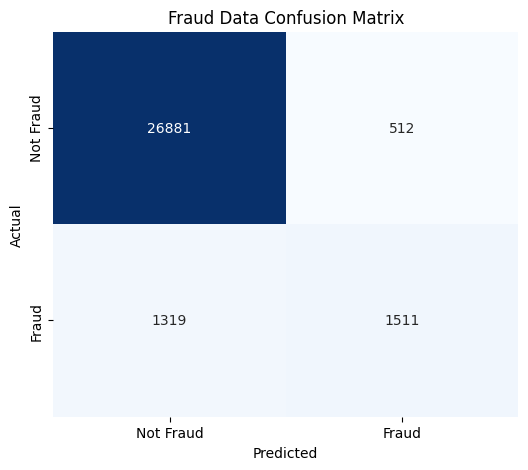

In [93]:
# Confusion Matrix and Plotting
cm_creditcard = confusion_matrix(y_test_credit, y_pred_creditcard)
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Credit Card Data Confusion Matrix')

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Fraud Data Confusion Matrix')

<Figure size 1000x600 with 0 Axes>

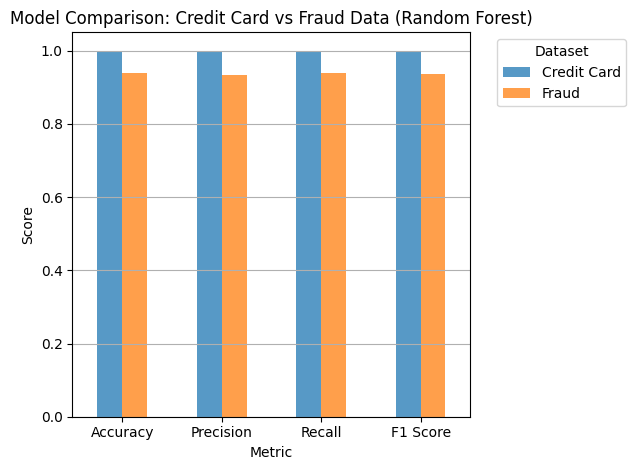

In [94]:
# Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Model Comparison: Credit Card vs Fraud Data (Random Forest)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()

4 Gradient Boosting

In [95]:
# Fit XGBoost Model
from xgboost import XGBClassifier
xgb_creditcard = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_creditcard.fit(X_train_creditcard_resampled, y_train_credit_resampled)

xgb_fraud = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Predictions
y_pred_creditcard = xgb_creditcard.predict(X_test_credit)
y_pred_fraud = xgb_fraud.predict(X_test_fraud)

# Evaluation Metrics
accuracy_creditcard = accuracy_score(y_test_credit, y_pred_creditcard)
precision_creditcard = precision_score(y_test_credit, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_credit, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_credit, y_pred_creditcard, average='weighted')

accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')

# Classification Reports
classification_report_creditcard = classification_report(y_test_credit, y_pred_creditcard)
print("Classification Report for Credit Card Data:\n", classification_report_creditcard)

classification_report_fraud = classification_report(y_test_fraud, y_pred_fraud)
print("Classification Report for Fraud Data:\n", classification_report_fraud)

Classification Report for Credit Card Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.86      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Classification Report for Fraud Data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.96      0.53      0.68      2830

    accuracy                           0.95     30223
   macro avg       0.96      0.76      0.83     30223
weighted avg       0.95      0.95      0.95     30223



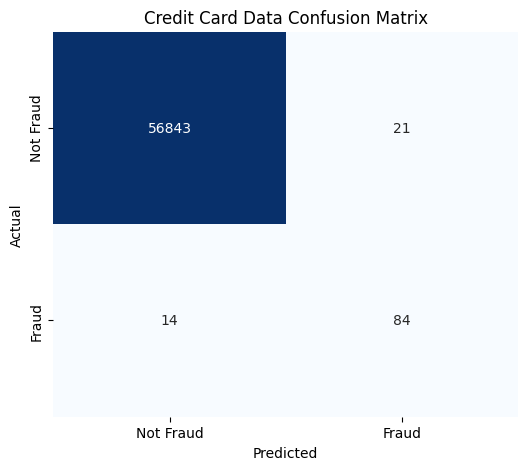

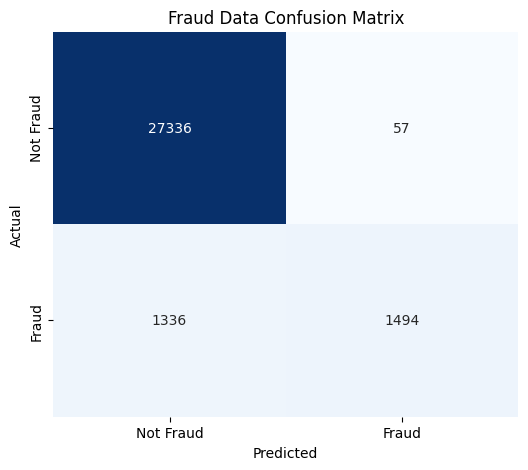

In [96]:
# Confusion Matrix and Plotting
cm_creditcard = confusion_matrix(y_test_credit, y_pred_creditcard)
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Credit Card Data Confusion Matrix')

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Fraud Data Confusion Matrix')

<Figure size 1000x600 with 0 Axes>

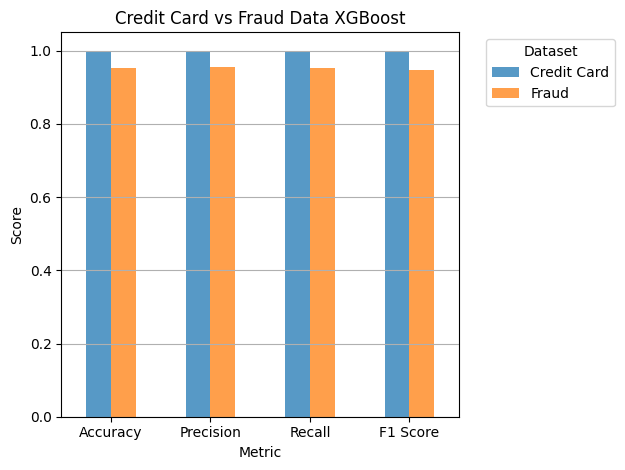

In [97]:
# Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Credit Card vs Fraud Data XGBoost')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()

In [98]:
from sklearn.neural_network import MLPClassifier
# Fit MLP Model
mlp_creditcard = MLPClassifier(random_state=42, max_iter=500)
mlp_creditcard.fit(X_train_creditcard_resampled, y_train_credit_resampled)

mlp_fraud = MLPClassifier(random_state=42, max_iter=500)
mlp_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Predictions
y_pred_creditcard = mlp_creditcard.predict(X_test_credit)
y_pred_fraud = mlp_fraud.predict(X_test_fraud)

In [99]:
# Evaluation Metrics
accuracy_creditcard = accuracy_score(y_test_credit, y_pred_creditcard)
precision_creditcard = precision_score(y_test_credit, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_credit, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_credit, y_pred_creditcard, average='weighted')

accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')

# Classification Reports
classification_report_creditcard = classification_report(y_test_credit, y_pred_creditcard)
print("Classification Report for Credit Card Data:\n", classification_report_creditcard)

classification_report_fraud = classification_report(y_test_fraud, y_pred_fraud)
print("Classification Report for Fraud Data:\n", classification_report_fraud)

Classification Report for Credit Card Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.88      0.44        98

    accuracy                           1.00     56962
   macro avg       0.65      0.94      0.72     56962
weighted avg       1.00      1.00      1.00     56962

Classification Report for Fraud Data:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     27393
           1       0.27      0.24      0.25      2830

    accuracy                           0.87     30223
   macro avg       0.59      0.59      0.59     30223
weighted avg       0.86      0.87      0.86     30223



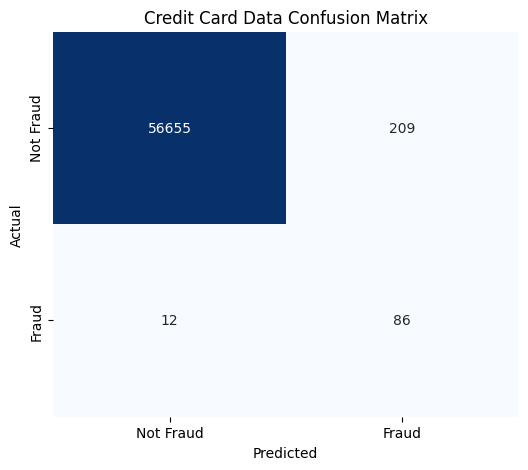

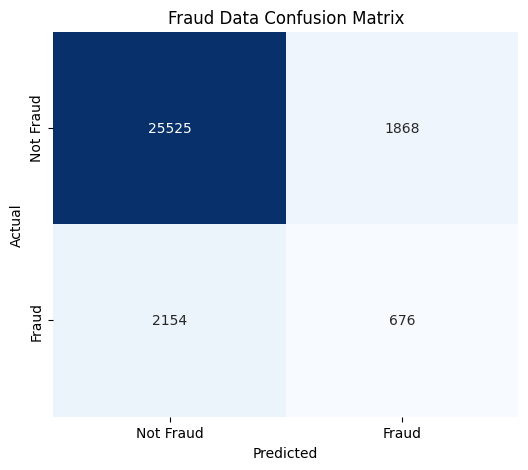

In [100]:
# Confusion Matrix and Plotting
cm_creditcard = confusion_matrix(y_test_credit, y_pred_creditcard)
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Credit Card Data Confusion Matrix')

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Fraud Data Confusion Matrix')

<Figure size 1000x600 with 0 Axes>

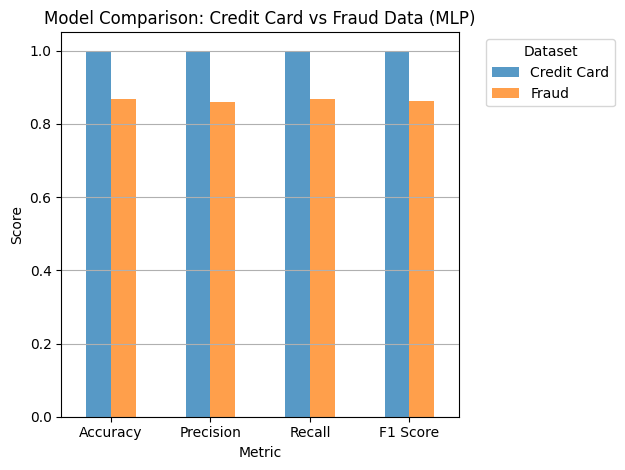

In [101]:
# Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Model Comparison: Credit Card vs Fraud Data (MLP)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()

In [102]:
import joblib

# Save the Decision Tree model for Credit Card Data
joblib.dump(dt_creditcard, 'dt_creditcard_model.pkl')

# Save the Decision Tree model for Fraud Data
joblib.dump(dt_fraud, 'dt_fraud_model.pkl')

['dt_fraud_model.pkl']

In [103]:


# Save the Logistic Regression model for Credit Card Data
joblib.dump(lr_creditcard, 'lr_creditcard_model.pkl')

# Save the Logistic Regression model for Fraud Data
joblib.dump(lr_fraud, 'lr_fraud_model.pkl')

# Save the Random Forest model for Credit Card Data
joblib.dump(rf_creditcard, 'rf_creditcard_model.pkl')

# Save the Random Forest model for Fraud Data
joblib.dump(rf_fraud, 'rf_fraud_model.pkl')

# Save the Gradient Boosting model for Credit Card Data
joblib.dump(xgb_creditcard, 'xgb_creditcard_model.pkl')

# Save the Gradient Boosting model for Fraud Data
joblib.dump(xgb_fraud, 'xgb_fraud_model.pkl')

# Save the MLP model for Credit Card Data
joblib.dump(mlp_creditcard, 'mlp_creditcard_model.pkl')

# Save the MLP model for Fraud Data
joblib.dump(mlp_fraud, 'mlp_fraud_model.pkl')


['mlp_fraud_model.pkl']

In [ ]:
# Train a model for credit card data
log_reg_credit = LogisticRegression()
log_reg_credit.fit(X_train_credit, y_train_credit)

# Train a separate model for fraud data
log_reg_fraud = LogisticRegression()
log_reg_fraud.fit(X_train_fraud, y_train_fraud)

# Now create SHAP explainers for each model
explainer_credit = shap.Explainer(log_reg_credit, X_train_credit)
explainer_fraud = shap.Explainer(log_reg_fraud, X_train_fraud)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# Credit card dataset model and SHAP explainer
log_reg_credit = LogisticRegression()
log_reg_credit.fit(X_train_credit, y_train_credit)
explainer_credit = shap.Explainer(log_reg_credit, X_train_credit)

# Fraud dataset model and SHAP explainer
log_reg_fraud = LogisticRegression()
log_reg_fraud.fit(X_train_fraud, y_train_fraud)
explainer_fraud = shap.Explainer(log_reg_fraud, X_train_fraud)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


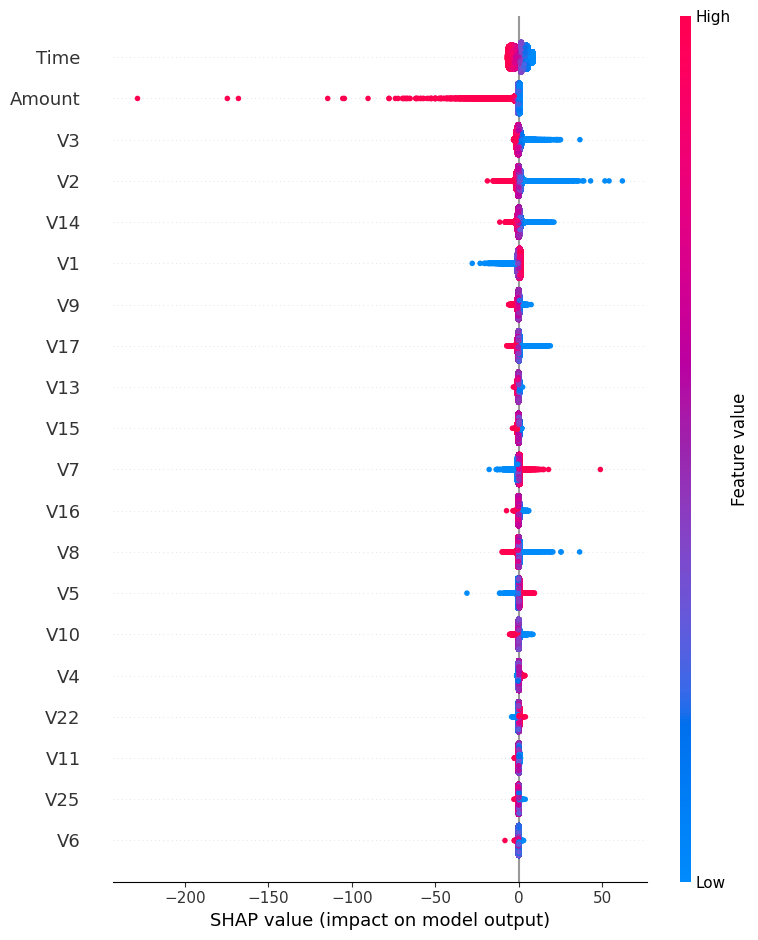

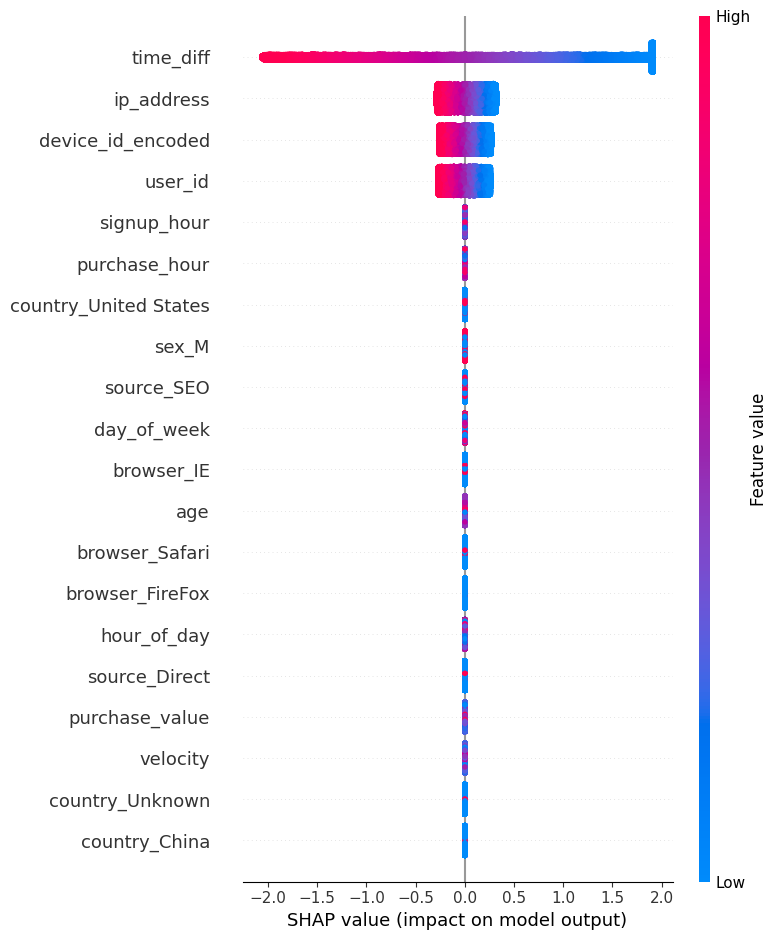

In [58]:
# For the credit card dataset
shap_values_credit = explainer_credit(X_train_credit)
shap.summary_plot(shap_values_credit, X_train_credit)

# For the fraud dataset
shap_values_fraud = explainer_fraud(X_train_fraud)
shap.summary_plot(shap_values_fraud, X_train_fraud)


In [59]:
import shap
shap.initjs()

Decision Tree (Credit Card): 0.9992099996488887
Decision Tree (Fraud Data): 0.9091420441385699


 97%|=================== | 440357/455690 [00:21<00:00]       

TypeError: only integer scalar arrays can be converted to a scalar index

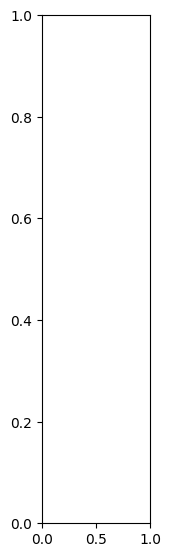

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree for Credit Card dataset
tree_credit = DecisionTreeClassifier()
tree_credit.fit(X_train_credit, y_train_credit)
y_pred_tree_credit = tree_credit.predict(X_test_credit)

print("Decision Tree (Credit Card):", accuracy_score(y_test_credit, y_pred_tree_credit))

# Decision Tree for Fraud dataset
tree_fraud = DecisionTreeClassifier()
tree_fraud.fit(X_train_fraud, y_train_fraud)
y_pred_tree_fraud = tree_fraud.predict(X_test_fraud)

print("Decision Tree (Fraud Data):", accuracy_score(y_test_fraud, y_pred_tree_fraud))

# SHAP Explainer for Decision Tree
explainer_tree_credit = shap.Explainer(tree_credit, X_train_credit)
shap_values_tree_credit = explainer_tree_credit(X_train_credit)
shap.summary_plot(shap_values_tree_credit, X_train_credit)

explainer_tree_fraud = shap.Explainer(tree_fraud, X_train_fraud)
shap_values_tree_fraud = explainer_tree_fraud(X_train_fraud)
shap.summary_plot(shap_values_tree_fraud, X_train_fraud)


In [61]:
print(shap_values_tree_credit.shape)
print(X_train_credit.shape)


(227845, 30, 2)
(227845, 30)


In [62]:
shap.plots.beeswarm(shap_values_tree_credit)


ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [ ]:
# For the credit card dataset
shap.dependence_plot("Amount", shap_values_credit, X_train_credit)


TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

In [ ]:
!jupyter install @jupyter-widgets/jupyterlab-manager

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir] [--paths] [--json]
               [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console dejavu execute kernel kernelspec migrate nbclassic
nbconvert nbextension notebook run server serverextension troubleshoot trust

Jupyter command `jupyter-install` not found.


In [ ]:
jupyter notebook


SyntaxError: invalid syntax (<ipython-input-83-ba6c65dc902f>, line 1)

In [ ]:
# For the credit card dataset
shap.force_plot(shap_values_credit[0].base_values, shap_values_credit[0].values, X_train_credit.iloc[0])

# For the fraud dataset
shap.force_plot(shap_values_fraud[0].base_values, shap_values_fraud[0].values, X_train_fraud.iloc[0])


In [ ]:
# For multiple samples in the credit card dataset
shap.force_plot(shap_values_credit[:100].base_values, shap_values_credit[:100].values, X_train_credit.iloc[:100])

# For multiple samples in the fraud dataset
shap.force_plot(shap_values_fraud[:100].base_values, shap_values_fraud[:100].values, X_train_fraud.iloc[:100])


In [ ]:
# For the credit card dataset
shap.force_plot(explainer_credit.expected_value, shap_values_credit[0], X_train_credit.iloc[0])

# For the fraud dataset
shap.force_plot(explainer_fraud.expected_value, shap_values_fraud[0], X_train_fraud.iloc[0])


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [ ]:
# For multiple samples in the credit card dataset
shap.force_plot(explainer_credit.expected_value, shap_values_credit[:100], X_train_credit[:100])

# For multiple samples in the fraud dataset
shap.force_plot(explainer_fraud.expected_value, shap_values_fraud[:100], X_train_fraud[:100])


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [ ]:
import shap

# Create an explainer for the Logistic Regression model
explainer_credit = shap.Explainer(log_reg, X_train_credit)
explainer_fraud = shap.Explainer(log_reg, X_train_fraud)


ValueError: shapes (201,) and (30,) not aligned: 201 (dim 0) != 30 (dim 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree for Credit Card Fraud
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_credit, y_train_credit)
y_pred_tree_credit = tree_clf.predict(X_test_credit)
print("Decision Tree (Credit Card):", accuracy_score(y_test_credit, y_pred_tree_credit))

# Decision Tree for Fraud Data
tree_clf.fit(X_train_fraud, y_train_fraud)
y_pred_tree_fraud = tree_clf.predict(X_test_fraud)
print("Decision Tree (Fraud Data):", accuracy_score(y_test_fraud, y_pred_tree_fraud))


Decision Tree (Credit Card): 0.9991046662687406
Decision Tree (Fraud Data): 0.9085464712305198


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest for Credit Card Fraud
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_credit, y_train_credit)
y_pred_rf_credit = rf_clf.predict(X_test_credit)
print("Random Forest (Credit Card):", accuracy_score(y_test_credit, y_pred_rf_credit))

# Random Forest for Fraud Data
rf_clf.fit(X_train_fraud, y_train_fraud)
y_pred_rf_fraud = rf_clf.predict(X_test_fraud)
print("Random Forest (Fraud Data):", accuracy_score(y_test_fraud, y_pred_rf_fraud))


Random Forest (Credit Card): 0.9995962220427653
Random Forest (Fraud Data): 0.9564239155609966


In [ ]:
import xgboost as xgb

# XGBoost for Credit Card Fraud
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_credit, y_train_credit)
y_pred_xgb_credit = xgb_clf.predict(X_test_credit)
print("XGBoost (Credit Card):", accuracy_score(y_test_credit, y_pred_xgb_credit))

# XGBoost for Fraud Data
xgb_clf.fit(X_train_fraud, y_train_fraud)
y_pred_xgb_fraud = xgb_clf.predict(X_test_fraud)
print("XGBoost (Fraud Data):", accuracy_score(y_test_fraud, y_pred_xgb_fraud))


XGBoost (Credit Card): 0.9995611109160493
XGBoost (Fraud Data): 0.9555305561989214


In [ ]:
from sklearn.neural_network import MLPClassifier

# MLP for Credit Card Fraud
mlp_clf = MLPClassifier(max_iter=500)
mlp_clf.fit(X_train_credit, y_train_credit)
y_pred_mlp_credit = mlp_clf.predict(X_test_credit)
print("MLP (Credit Card):", accuracy_score(y_test_credit, y_pred_mlp_credit))

# MLP for Fraud Data
mlp_clf.fit(X_train_fraud, y_train_fraud)
y_pred_mlp_fraud = mlp_clf.predict(X_test_fraud)
print("MLP (Fraud Data):", accuracy_score(y_test_fraud, y_pred_mlp_fraud))


MLP (Credit Card): 0.9982795547909132
MLP (Fraud Data): 0.9052046454686828


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Start tracking your MLflow experiments
mlflow.set_experiment("Fraud Detection Experiment")

# Function to train, evaluate, and log results for a model
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, dataset_name):
    with mlflow.start_run(run_name=f"{model_name} ({dataset_name})"):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Log parameters, metrics, and model
        mlflow.log_param("Model Name", model_name)
        mlflow.log_param("Dataset", dataset_name)
        mlflow.log_metric("Accuracy", accuracy)

        # Log the trained model
        mlflow.sklearn.log_model(model, f"{model_name}_{dataset_name}_model")

        print(f"{model_name} ({dataset_name}): Accuracy = {accuracy}")
        return accuracy

# Prepare your datasets and models
models = [
    (LogisticRegression(), "Logistic Regression"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (RandomForestClassifier(), "Random Forest"),
    (xgb.XGBClassifier(), "XGBoost")
]

# Credit card fraud dataset
for model, model_name in models:
    train_and_evaluate_model(model, model_name, X_train_credit, X_test_credit, y_train_credit, y_test_credit, "Credit Card")

# Fraud dataset
for model, model_name in models:
    train_and_evaluate_model(model, model_name, X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud, "Fraud Data")


2024/10/20 13:12:27 INFO mlflow.tracking.fluent: Experiment with name 'Fraud Detection Experiment' does not exist. Creating a new experiment.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2024/10/20 13:12:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression (Credit Card): Accuracy = 0.9986306660580738


2024/10/20 13:13:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree (Credit Card): Accuracy = 0.9991222218320986


2024/10/20 13:19:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest (Credit Card): Accuracy = 0.9995962220427653


2024/10/20 13:19:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost (Credit Card): Accuracy = 0.9995611109160493


2024/10/20 13:20:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression (Fraud Data): Accuracy = 0.9057009562253913


2024/10/20 13:20:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree (Fraud Data): Accuracy = 0.9083479469278364


2024/10/20 13:21:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest (Fraud Data): Accuracy = 0.9564239155609966


2024/10/20 13:21:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost (Fraud Data): Accuracy = 0.9555305561989214


## Task-3 Model Explainability

In [ ]:
! pip install shap
! pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0b2d9433fbca1f3d3367aa98793414950a8bb5819b011d58fce6bcf8113caa9b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
print(X_train_credit.shape)  # Check the number of features
print(X_train_fraud.shape)   # Similarly, for fraud data


(227845, 30)
(120889, 201)


In [ ]:
print(X_train_credit.shape)  # (227845, 30) indicates the number of rows and columns
print(X_train_credit.columns)  # Check the column names to identify any transformations


(227845, 30)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [ ]:
import shap

# Train the Decision Tree model (you already have this part)
# tree_clf.fit(X_train_credit, y_train_credit)

# Initialize SHAP explainer for Decision Tree
explainer_tree_credit = shap.TreeExplainer(tree_clf)

# Calculate SHAP values for the test set
shap_values_tree_credit = explainer_tree_credit.shap_values(X_test_credit)

# SHAP Summary Plot for Decision Tree (Credit Card)
shap.summary_plot(shap_values_tree_credit, X_test_credit, feature_names=X_train_credit.columns)

# Optional: SHAP dependence plot for a specific feature
# shap.dependence_plot('purchase_value', shap_values_tree_credit, X_test_credit)


NameError: name 'tree_clf' is not defined